In [3]:
from pathlib import Path
from image_feature_matching.lightglue import LightGlue, SuperPoint, DISK
from image_feature_matching.lightglue.utils import load_image, rbd
from image_feature_matching.lightglue import viz2d
import torch


In [4]:
device = "cuda"
extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)

Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_v1.pth" to C:\Users\SagarLingaraj/.cache\torch\hub\checkpoints\superpoint_v1.pth
100.0%
Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_lightglue.pth" to C:\Users\SagarLingaraj/.cache\torch\hub\checkpoints\superpoint_lightglue_v0-1_arxiv.pth
100.0%


In [45]:
image0 = load_image("src\preprocessing\py\map_cleaner\modified_image_grayscale_cleanup.pgm")
image1 = load_image("src\preprocessing\py\map_cleaner\modified_image_grayscale_cleanup.jpeg")

In [46]:
feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))

In [47]:
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

print(matches01)

{'matches0': tensor([   5,    1,    3,  ...,   -1, 1775,   -1], device='cuda:0'), 'matches1': tensor([ 449,    1,  301,  ...,   -1, 2027, 1146], device='cuda:0'), 'matching_scores0': tensor([0.9997, 0.9825, 0.9988,  ..., 0.0000, 0.7761, 0.0000], device='cuda:0',
       grad_fn=<SelectBackward0>), 'matching_scores1': tensor([0.1549, 0.9825, 0.9906,  ..., 0.0000, 0.9021, 0.4961], device='cuda:0',
       grad_fn=<SelectBackward0>), 'stop': 4, 'matches': tensor([[   0,    5],
        [   1,    1],
        [   2,    3],
        ...,
        [2041, 1931],
        [2043, 2004],
        [2046, 1775]], device='cuda:0'), 'scores': tensor([0.9997, 0.9825, 0.9988,  ..., 0.8001, 0.9293, 0.7761], device='cuda:0',
       grad_fn=<IndexBackward0>), 'prune0': tensor([4, 4, 4,  ..., 4, 4, 4], device='cuda:0'), 'prune1': tensor([4, 4, 4,  ..., 2, 4, 4], device='cuda:0')}


2048 2048


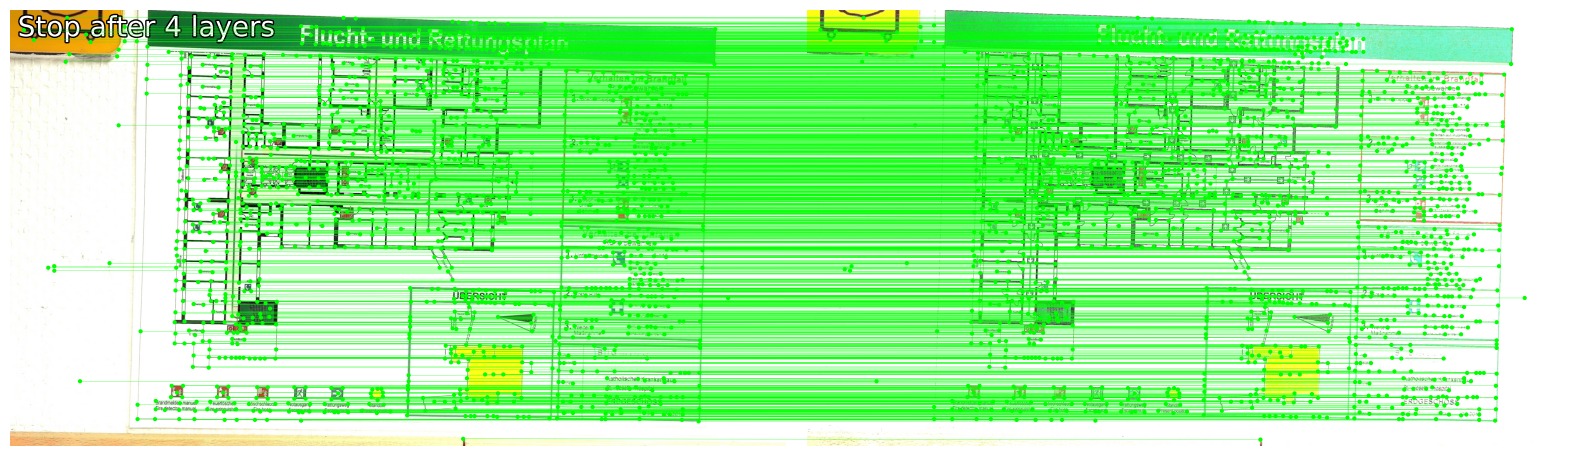

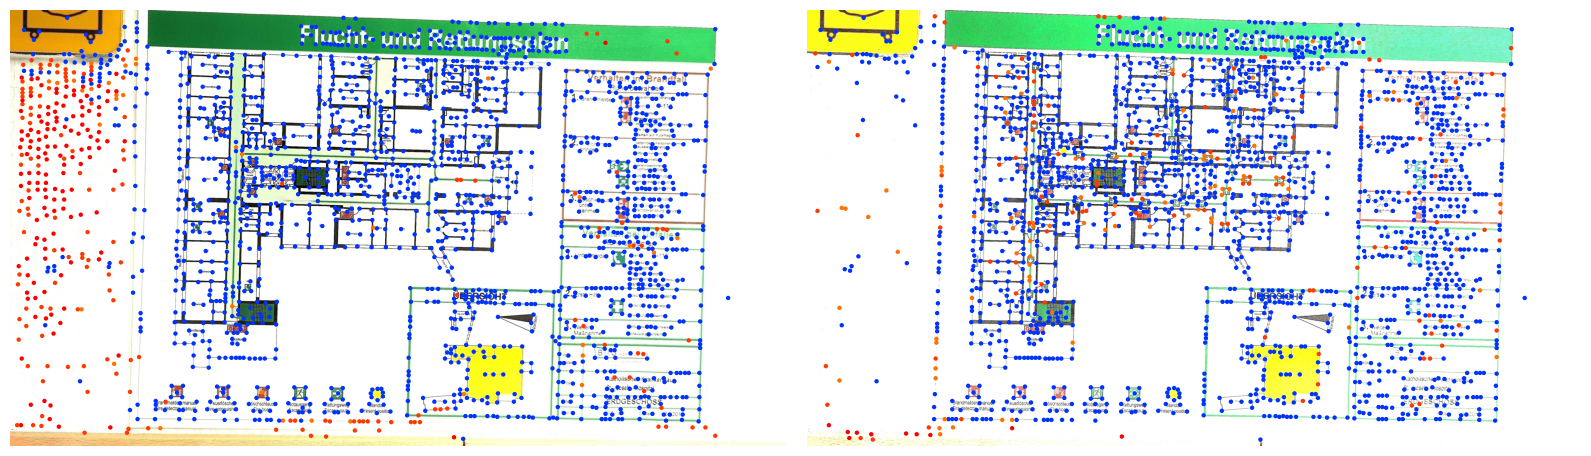

In [48]:
kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]

print(len(kpts0), len(kpts1))
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)